In [3]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Dropout
from xgboost import XGBClassifier
import seaborn as sn
from sklearn.metrics import accuracy_score
import log
import tensorflow as tf
from read_images_tf_colab import ReadImages
from sklearn.model_selection import train_test_split

2019-09-07 20:22:25,054 - INFO - read_images_tf_colab - Reading Data File : sign_mnist_train.csv


(5596, 28, 28, 1)
(5596,)


In [0]:
logger = log.setup_custom_logger('CNN-Images')
def run_model_cnn(train_images, train_labels, test_images, test_labels):


	
	train_labels = keras.utils.np_utils.to_categorical(train_labels)
	test_labels = keras.utils.np_utils.to_categorical(test_labels)

	model = keras.models.Sequential([
		#32 5x5 subregions
	    keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=[28, 28, 1]),
	    #2x2 pool with with stripe of two so they don't overlap
	    keras.layers.MaxPool2D((2,2)),
	    #64 5x5 filters
	    keras.layers.Conv2D(64, (3, 3), padding="same"),
	    #pool again
	    keras.layers.MaxPool2D((2,2)),
	    #flatten before dense layer
	    keras.layers.Flatten(),
	    #dense neuron layer
	    keras.layers.Dense(1024, activation='relu'),
	    keras.layers.Dropout(0.5),
	    #dense layer for output
	    keras.layers.Dense(25, activation='softmax')
	])
	# model = keras.models.Sequential()
	# model.add(keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1,)))
	# model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
	# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
	# model.add(keras.layers.Dropout(0.3))
	# model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
	# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
	# model.add(keras.layers.Conv2D(128, (2,2), padding='same', activation='relu'))
	# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
	# model.add(keras.layers.Dropout(0.3))
	# model.add(keras.layers.Flatten())
	# model.add(keras.layers.Dense(1500, activation='relu'))
	# model.add(keras.layers.Dropout(0.5))
	# model.add(keras.layers.Dense(25, activation='softmax'))
	
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	model.fit(train_images, train_labels, validation_split=0.5, batch_size=64, epochs=5, verbose=True)
	test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
	print("Loss : {}".format(test_loss))
	print("Accuracy : {}".format(test_accuracy))
	logger.info("Running Prediction")
	predictions = model.predict_classes(test_images)
	logger.debug("Making Confusion Matrix")

In [0]:
image_reader = ReadImages()

In [0]:
image_reader = ReadImages()
data_dir = 'sign_mnist_train.csv'

#train_images, test_images, train_labels, test_labels = image_reader.process_image_wrapper(data_dir)
train_images, test_images, train_labels, test_labels, feature_names = image_reader.read_pixel_csv(data_dir, test_train_split=0.01, reshape=False)

logger.info("Train Image Shape : {}".format(train_images.shape))
logger.info("Test Image Shape : {}".format(test_images.shape))
logger.info("Train Label Shape : {}".format(train_labels.shape))
logger.info("Train Label Shape : {}".format(test_labels.shape))


print(train_images[0])

#run_model_cnn(train_images, train_labels, test_images, test_labels)

**Using XGBoost -- Vince**

In [0]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize, StandardScaler
import random
from sklearn.ensemble import VotingClassifier

In [0]:
#train = pd.read_csv('sign_mnist_train.csv')
#test = pd.read_csv('sign_mnist_test.csv')

In [0]:
#X_train = np.array(train.iloc[:, 1:])
#y_train = np.array(train.iloc[:, 0]) # target values of training dataset
#X_test =  np.array(test.iloc[:, 1:])
#$y_test = np.array(test.iloc[:, 0]) # target values of testing dataset
#train.shape

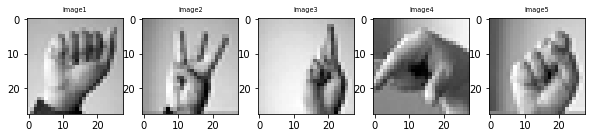

In [14]:
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(train_images[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(train_images)
X_test = StandardScaler().fit_transform(test_images)


In [16]:
print(X_train.shape)
print(X_test.shape)

(23955, 784)
(242, 784)


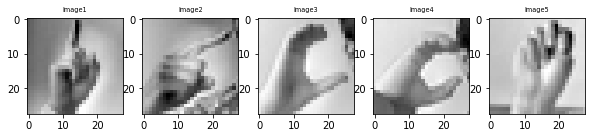

In [0]:
#n_row = 1
#n_col = 5
#plt.figure(figsize=(10,8))
#for i in list(range(n_row*n_col)):
#    plt.subplot(n_row, n_col, i+1)
#    plt.imshow(X_train[i,:].reshape(28,28), cmap="gray")
#    title_text = "Image" + str(i+1)
#    plt.title(title_text, size=6.5)

#plt.show()

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.1)

In [0]:
param_list = [
    ('max_depth', 5),                 # the maximum depth of each tree
    ('eta', 0.3),                     # the training step for each iteration
    ('verbosity', 1),                 # logging mode - warn
    ('objective','multi:softmax'),   # multiclass classification using the softmax objective
    ('num_class', 26)                 # the number of classes that exist in this datset
]  
n_rounds = 600
early_stopping = 50

In [19]:
#2391.698961  = 39.86 minutes
import time
start = time.time()
model = XGBClassifier(nthread=-1)
d_train = xgb.DMatrix(X_train, label=y_train)
d_val = xgb.DMatrix(X_valid, label=y_valid)
eval_list = [(d_train, "train"), (d_val, "validation")]
bst = xgb.train(param_list, d_train, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping, verbose_eval=True)
elapsed = time.time() - start
print("Parallel Thread XGBoost, Single Thread CV: %f" % (elapsed))

[0]	train-merror:0.304513	validation-merror:0.371452
Multiple eval metrics have been passed: 'validation-merror' will be used for early stopping.

Will train until validation-merror hasn't improved in 50 rounds.
[1]	train-merror:0.191985	validation-merror:0.260017
[2]	train-merror:0.137251	validation-merror:0.201586
[3]	train-merror:0.097593	validation-merror:0.167362
[4]	train-merror:0.073658	validation-merror:0.143573
[5]	train-merror:0.057006	validation-merror:0.122287
[6]	train-merror:0.044715	validation-merror:0.103923
[7]	train-merror:0.034881	validation-merror:0.093907
[8]	train-merror:0.027645	validation-merror:0.084307
[9]	train-merror:0.022079	validation-merror:0.073456
[10]	train-merror:0.017255	validation-merror:0.066361
[11]	train-merror:0.01322	validation-merror:0.0601
[12]	train-merror:0.010668	validation-merror:0.056344
[13]	train-merror:0.008442	validation-merror:0.052588
[14]	train-merror:0.007143	validation-merror:0.047162
[15]	train-merror:0.005659	validation-merror

**Predict against the best model**

In [0]:
dtest = xgb.DMatrix(test_images, label=test_labels)
preds = bst.predict(dtest)

**Print out the accuracy**

In [32]:
from sklearn import metrics
acc = metrics.accuracy_score(test_labels, preds)
print('Accuracy: %f' % acc)

Accuracy: 0.983471


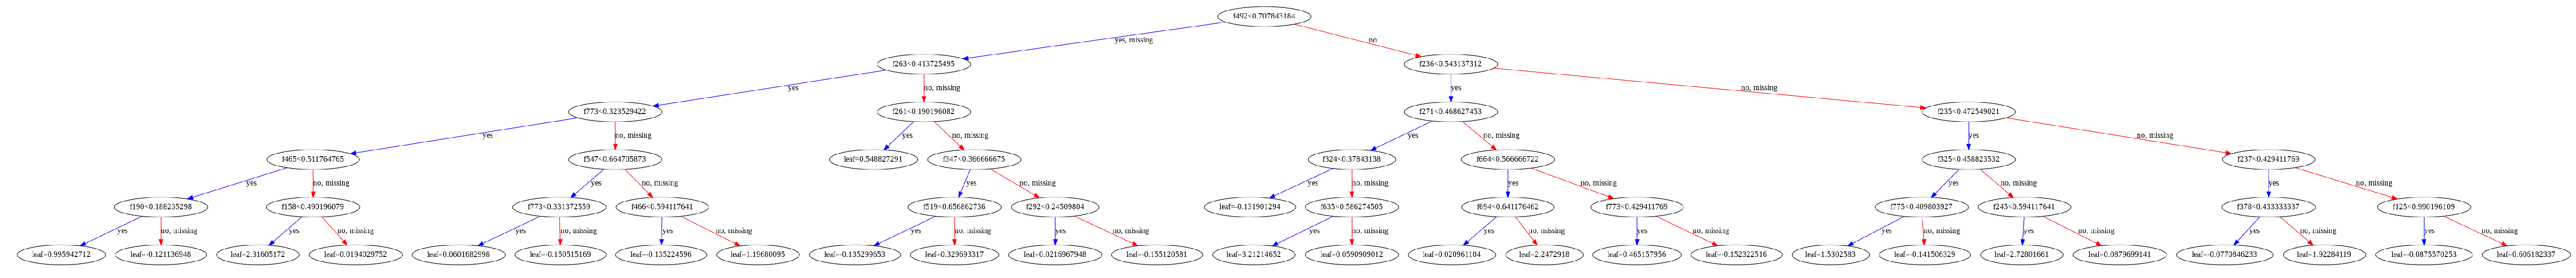

<Figure size 432x288 with 0 Axes>

In [39]:
fig, ax = plt.subplots(figsize=(100, 200))
xgb.plot_tree(bst, num_trees=4, ax=ax)
plt.show()
plt.savefig("temp.pdf")